In [2]:
import pandas
X = pandas.read_csv('df_dropped_phase2.csv')
print(X)

                   ts  flow_duration  Header_Length  Source Port  \
0        1.701728e+09       0.000000           1514           80   
1        1.701728e+09       0.000548           1568        48884   
2        1.701728e+09       0.002528           1622        48884   
3        1.701728e+09       0.004881           1676        48884   
4        1.701728e+09       0.007555           3189           80   
...               ...            ...            ...          ...   
9536818  1.701550e+09       2.018212           5460        41544   
9536819  1.701550e+09       0.021296           1432          502   
9536820  1.701550e+09       2.018227           5670        41544   
9536821  1.701550e+09       2.018277           5880        41544   
9536822  1.701550e+09       2.018348           6090        41544   

         Destination Port  Protocol Type  Duration         Rate        Srate  \
0                   48884              6       127     0.000000     0.000000   
1                      

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X is your Pandas DataFrame (unlabeled data)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Save the training set to a CSV file
X_train.to_csv('training_set.csv', index=False)

# Save the test set to a CSV file
X_test.to_csv('test_set.csv', index=False)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no refitting)
X_test_scaled = scaler.transform(X_test)

# Optionally: Save the scaled data to CSV
pd.DataFrame(X_train_scaled).to_csv('training_set_scaled.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('test_set_scaled.csv', index=False)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_dropped_computed is your computed Pandas DataFrame

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X_train_scaled)
pd.DataFrame(df_standardized).to_csv('df_standardized.csv', index=False)

In [1]:
import pandas
df_standardized = pandas.read_csv('df_standardized.csv')

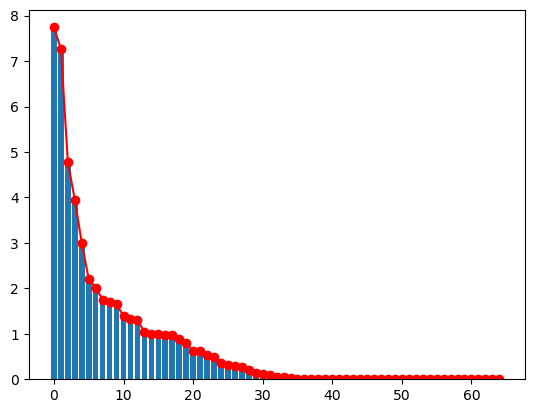

Number of components explaining 90% of variance: 19


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Fit and apply PCA to the standardized data
pca = PCA()
pca.fit(df_standardized)
df_pca_all = pca.transform(df_standardized)

# Convert the PCA results to a DataFrame
df_pca_all = pd.DataFrame(df_pca_all)

# Save the PCA-transformed data to a CSV file
df_pca_all.to_csv('pca_transformed_data.csv', index=False)

# Extract eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_

# Plot eigenvalues to visualize variance explained by each component
plt.bar(np.arange(0, df_standardized.shape[1], 1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()

# Print the number of components explaining 90% of the variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Number of components explaining 90% of variance: {n_components_90}")



In [ ]:
import pandas
df_standardized = pandas.read_csv('pca_transformed_data.csv')